In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df_salaries = pd.read_csv('Dataset/Salaries.csv')
df_teams = pd.read_csv('Dataset/Teams.csv')



In [5]:
df_salaries.head()

,yearID,teamID,lgID,playerID,salary
0,1985,BAL,AL,murraed02,1472819
1,1985,BAL,AL,lynnfr01,1090000
2,1985,BAL,AL,ripkeca01,800000
3,1985,BAL,AL,lacyle01,725000
4,1985,BAL,AL,flanami01,641667


In [6]:
df_teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,PH1,PNA,NaN,1,28,NaN,21,7,...,NaN,0.84,Philadelphia Athletics,Jefferson Street Grounds,NaN,102,98,ATH,PH1,PH1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
3,1871,NaN,WS3,OLY,NaN,4,32,NaN,15,15,...,NaN,0.85,Washington Olympics,Olympics Grounds,NaN,94,98,OLY,WS3,WS3
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [7]:
#Group with respect to the column names and then calculate sum of a particular column
grouped = df_salaries.groupby(['yearID', 'teamID'])
df_summarized_salaries = grouped['salary'].sum()
df_summarized_salaries.head()

yearID  teamID
1985    ATL       14807000
        BAL       11560712
        BOS       10897560
        CAL       14427894
        CHA        9846178
Name: salary, dtype: int64

In [8]:
#Since the value of grouped sum is of return type series.Series we need to create a frame from
#that specific return type and hence the to_frame call
df_merged = pd.merge(df_teams, df_summarized_salaries.to_frame(), on=['yearID', 'teamID'])
df_merged.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,salary
0,1985,AL,TOR,TOR,E,1,161,80.0,99,62,...,0.98,Toronto Blue Jays,Exhibition Stadium,2468925.0,104,103,TOR,TOR,TOR,8812550
1,1985,AL,NYA,NYY,E,2,161,80.0,97,64,...,0.97,New York Yankees,Yankee Stadium II,2214587.0,98,97,NYY,NYA,NYA,14238204
2,1985,AL,DET,DET,E,3,161,81.0,84,77,...,0.97,Detroit Tigers,Tiger Stadium,2286609.0,100,98,DET,DET,DET,10348143
3,1985,AL,BAL,BAL,E,4,161,81.0,83,78,...,0.98,Baltimore Orioles,Memorial Stadium,2132387.0,97,97,BAL,BAL,BAL,11560712
4,1985,AL,BOS,BOS,E,5,163,81.0,81,81,...,0.97,Boston Red Sox,Fenway Park II,1786633.0,104,104,BOS,BOS,BOS,10897560


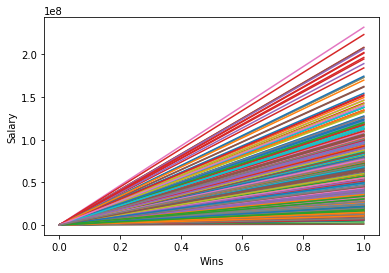

In [9]:
plt.plot([df_merged['W'], df_merged['salary']])
plt.ylabel('Salary')
plt.xlabel('Wins')
plt.show()


In [15]:
for years in df_merged['yearID'].unique():
    condition = ('yearID == (%d)' % years)
    df_for_year = df_merged.query(condition)
    plt.scatter(df_for_year['W'], df_for_year['salary'], cmap=["upper left": "red"])
    plt.ylabel('Salary')
    plt.xlabel('Wins')
    plt.legend("upper right")
    plt.show()
    
print(df_merged['teamID'].unique())

SyntaxError: invalid syntax (<ipython-input-15-e33a9b6a2eeb>, line 4)